In [1]:
import pandas as pd  
import numpy as np  
import datetime  
  
# import data  
data = pd.read_csv("Bank data.csv", index_col = ["bank", "year"],   
                   parse_dates = True)

In [2]:
data

Bank ID     ROE     ROA  Solvency Ratio  Liquidity Ratio
bank year                                                                
JPM  2015-01-01        1  0.0934  0.0092            8.50             1.02
     2016-01-01        1  0.0903  0.0092            8.80             1.01
     2017-01-01        1  0.0878  0.0088            8.91             1.02
     2018-01-01        1  0.1194  0.0118            9.22             1.00
     2019-01-01        1  0.1326  0.0127            9.28             0.92
BAC  2015-01-01        2  0.0934  0.0092            8.50             1.02
     2016-01-01        2  0.0903  0.0092            8.80             1.01
     2017-01-01        2  0.0878  0.0088            8.91             1.02
     2018-01-01        2  0.1194  0.0118            9.22             1.00
     2019-01-01        2  0.1321  0.0127            9.28             0.92
WFC  2015-01-01        3  0.1117  0.0123            8.22             0.93
     2016-01-01        3  0.1012  0.0107            8.63             0.92
     2017-01-01        3  0.0998  0.0106            8.38             0.88
     2018-01-01        3  0.1023  0.0109            8.62             0.88
     2019-01-01        3  0.0919  0.0093            9.25             0.87
USB  2015-01-01        4  0.1227  0.0135            8.01             0.83
     2016-01-01        4  0.1166  0.0127            8.30             0.83
     2017-01-01        4  0.1204  0.0129            8.30             0.82
     2018-01-01        4  0.1339  0.0146            8.05             0.85
     2019-01-01        4  0.1237  0.0136            8.44             0.83
TFC  2015-01-01        5  0.0741  0.0097            6.68             0.88
     2016-01-01        5  0.0766  0.0103            6.33             0.88
     2017-01-01        5  0.0740  0.0100            6.46             0.87
     2018-01-01        5  0.1024  0.0137            6.48             0.92
     2019-01-01        5  0.0750  0.0104            6.11             0.94

In [3]:
data.index.get_level_values("year")

DatetimeIndex(['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [4]:
diff_index = data.groupby(level=0).diff(-1).dropna().index

In [5]:
diff_index

MultiIndex([('JPM', '2015-01-01'),
            ('JPM', '2016-01-01'),
            ('JPM', '2017-01-01'),
            ('JPM', '2018-01-01'),
            ('BAC', '2015-01-01'),
            ('BAC', '2016-01-01'),
            ('BAC', '2017-01-01'),
            ('BAC', '2018-01-01'),
            ('WFC', '2015-01-01'),
            ('WFC', '2016-01-01'),
            ('WFC', '2017-01-01'),
            ('WFC', '2018-01-01'),
            ('USB', '2015-01-01'),
            ('USB', '2016-01-01'),
            ('USB', '2017-01-01'),
            ('USB', '2018-01-01'),
            ('TFC', '2015-01-01'),
            ('TFC', '2016-01-01'),
            ('TFC', '2017-01-01'),
            ('TFC', '2018-01-01')],
           names=['bank', 'year'])

In [6]:
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby(level=0).diff(-1)

In [7]:
data_dict["Diff Data"]

Bank ID     ROE     ROA  Solvency Ratio  Liquidity Ratio
bank year                                                                
JPM  2015-01-01      0.0  0.0031  0.0000           -0.30             0.01
     2016-01-01      0.0  0.0025  0.0004           -0.11            -0.01
     2017-01-01      0.0 -0.0316 -0.0030           -0.31             0.02
     2018-01-01      0.0 -0.0132 -0.0009           -0.06             0.08
     2019-01-01      NaN     NaN     NaN             NaN              NaN
BAC  2015-01-01      0.0  0.0031  0.0000           -0.30             0.01
     2016-01-01      0.0  0.0025  0.0004           -0.11            -0.01
     2017-01-01      0.0 -0.0316 -0.0030           -0.31             0.02
     2018-01-01      0.0 -0.0127 -0.0009           -0.06             0.08
     2019-01-01      NaN     NaN     NaN             NaN              NaN
WFC  2015-01-01      0.0  0.0105  0.0016           -0.41             0.01
     2016-01-01      0.0  0.0014  0.0001            0.25             0.04
     2017-01-01      0.0 -0.0025 -0.0003           -0.24             0.00
     2018-01-01      0.0  0.0104  0.0016           -0.63             0.01
     2019-01-01      NaN     NaN     NaN             NaN              NaN
USB  2015-01-01      0.0  0.0061  0.0008           -0.29             0.00
     2016-01-01      0.0 -0.0038 -0.0002            0.00             0.01
     2017-01-01      0.0 -0.0135 -0.0017            0.25            -0.03
     2018-01-01      0.0  0.0102  0.0010           -0.39             0.02
     2019-01-01      NaN     NaN     NaN             NaN              NaN
TFC  2015-01-01      0.0 -0.0025 -0.0006            0.35             0.00
     2016-01-01      0.0  0.0026  0.0003           -0.13             0.01
     2017-01-01      0.0 -0.0284 -0.0037           -0.02            -0.05
     2018-01-01      0.0  0.0274  0.0033            0.37            -0.02
     2019-01-01      NaN     NaN     NaN             NaN              NaN

In [8]:
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()
data_dict["Diff Data"]

Bank ID     ROE     ROA  Solvency Ratio  Liquidity Ratio
bank year                                                                
JPM  2015-01-01      0.0  0.0031  0.0000           -0.30             0.01
     2016-01-01      0.0  0.0025  0.0004           -0.11            -0.01
     2017-01-01      0.0 -0.0316 -0.0030           -0.31             0.02
     2018-01-01      0.0 -0.0132 -0.0009           -0.06             0.08
BAC  2015-01-01      0.0  0.0031  0.0000           -0.30             0.01
     2016-01-01      0.0  0.0025  0.0004           -0.11            -0.01
     2017-01-01      0.0 -0.0316 -0.0030           -0.31             0.02
     2018-01-01      0.0 -0.0127 -0.0009           -0.06             0.08
WFC  2015-01-01      0.0  0.0105  0.0016           -0.41             0.01
     2016-01-01      0.0  0.0014  0.0001            0.25             0.04
     2017-01-01      0.0 -0.0025 -0.0003           -0.24             0.00
     2018-01-01      0.0  0.0104  0.0016           -0.63             0.01
USB  2015-01-01      0.0  0.0061  0.0008           -0.29             0.00
     2016-01-01      0.0 -0.0038 -0.0002            0.00             0.01
     2017-01-01      0.0 -0.0135 -0.0017            0.25            -0.03
     2018-01-01      0.0  0.0102  0.0010           -0.39             0.02
TFC  2015-01-01      0.0 -0.0025 -0.0006            0.35             0.00
     2016-01-01      0.0  0.0026  0.0003           -0.13             0.01
     2017-01-01      0.0 -0.0284 -0.0037           -0.02            -0.05
     2018-01-01      0.0  0.0274  0.0033            0.37            -0.02

In [13]:
data_diff = data_dict["Diff Data"]

In [15]:
from statsmodels.tsa.stattools import adfuller
X = data_diff["ROE"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
X = data_diff["ROA"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
X = data_diff["Solvency Ratio"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
X = data_diff["Liquidity Ratio"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.275110
p-value: 0.640481
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Failed to Reject Ho - Time Series is Non-Stationary
ADF Statistic: -1.472154
p-value: 0.547239
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Failed to Reject Ho - Time Series is Non-Stationary
ADF Statistic: -4.577596
p-value: 0.000142
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656
Reject Ho - Time Series is Stationary
ADF Statistic: 0.805256
p-value: 0.991721
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Failed to Reject Ho - Time Series is Non-Stationary


In [18]:
data_diff = data_diff.diff().dropna()
data_diff

Bank ID     ROE     ROA  Solvency Ratio  Liquidity Ratio
bank year                                                                
JPM  2017-01-01      0.0 -0.0335 -0.0038           -0.39             0.05
     2018-01-01      0.0  0.0525  0.0055            0.45             0.03
BAC  2015-01-01      0.0 -0.0021 -0.0012           -0.49            -0.13
     2016-01-01      0.0 -0.0169 -0.0005            0.43             0.05
     2017-01-01      0.0 -0.0335 -0.0038           -0.39             0.05
     2018-01-01      0.0  0.0530  0.0055            0.45             0.03
WFC  2015-01-01      0.0  0.0043  0.0004           -0.60            -0.13
     2016-01-01      0.0 -0.0323 -0.0040            1.01             0.10
     2017-01-01      0.0  0.0052  0.0011           -1.15            -0.07
     2018-01-01      0.0  0.0168  0.0023            0.10             0.05
USB  2015-01-01      0.0 -0.0172 -0.0027            0.73            -0.02
     2016-01-01      0.0 -0.0056 -0.0002           -0.05             0.02
     2017-01-01      0.0  0.0002 -0.0005           -0.04            -0.05
     2018-01-01      0.0  0.0334  0.0042           -0.89             0.09
TFC  2015-01-01      0.0 -0.0364 -0.0043            1.38            -0.07
     2016-01-01      0.0  0.0178  0.0025           -1.22             0.03
     2017-01-01      0.0 -0.0361 -0.0049            0.59            -0.07
     2018-01-01      0.0  0.0868  0.0110            0.28             0.09

In [20]:
from statsmodels.tsa.stattools import adfuller
X = data_diff["ROE"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
X = data_diff["Solvency Ratio"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
X = data_diff["Liquidity Ratio"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -3.296969
p-value: 0.015015
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Reject Ho - Time Series is Stationary
ADF Statistic: -3.719737
p-value: 0.003844
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Reject Ho - Time Series is Stationary
ADF Statistic: -3.586077
p-value: 0.006033
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702
Reject Ho - Time Series is Stationary


In [9]:
from linearmodels import PanelOLS
# . . . .
y_name = ["ROE"]
X_names = ["Solvency Ratio",
          "Liquidity Ratio"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

Data
Entity = True
Time = True


C:\Users\HP\AppData\Local\Temp/ipykernel_8624/3485620510.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


Data
                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROE   R-squared:                        0.3168
Estimator:                   PanelOLS   R-squared (Between):             -2.8593
No. Observations:                  25   R-squared (Within):               0.1573
Date:                Wed, Apr 13 2022   R-squared (Overall):             -1.4371
Time:                        20:58:17   Log-likelihood                    85.641
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3.2464
Entities:                           5   P-value                           0.0695
Avg Obs:                       5.0000   Distribution:                    F(2,14)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             116.98
                       

C:\Users\HP\AppData\Local\Temp/ipykernel_8624/3485620510.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\HP\AppData\Local\Temp/ipykernel_8624/3485620510.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROE   R-squared:                        0.2248
Estimator:                   PanelOLS   R-squared (Between):              0.4365
No. Observations:                  25   R-squared (Within):               0.2248
Date:                Wed, Apr 13 2022   R-squared (Overall):              0.3367
Time:                        20:58:18   Log-likelihood                    76.424
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2.6105
Entities:                           5   P-value                           0.1010
Avg Obs:                       5.0000   Distribution:                    F(2,18)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             1.1147
                            

C:\Users\HP\AppData\Local\Temp/ipykernel_8624/3485620510.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\HP\AppData\Local\Temp/ipykernel_8624/3485620510.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1



Entity = False
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:                    ROE   R-squared:                        0.0125
Estimator:                   PanelOLS   R-squared (Between):              0.1451
No. Observations:                  20   R-squared (Within):              -0.0121
Date:                Wed, Apr 13 2022   R-squared (Overall):              0.0125
Time:                        20:58:18   Log-likelihood                    56.151
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.1077
Entities:                           5   P-value                           0.8985
Avg Obs:                       4.0000   Distribution:                    F(2,17)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):         

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Diff Data\nEntity = False Time = False')

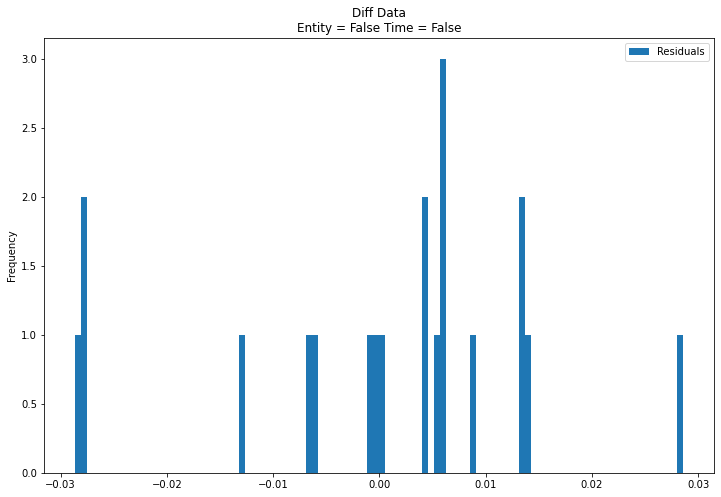

In [11]:
#plot distribution of residuals
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )


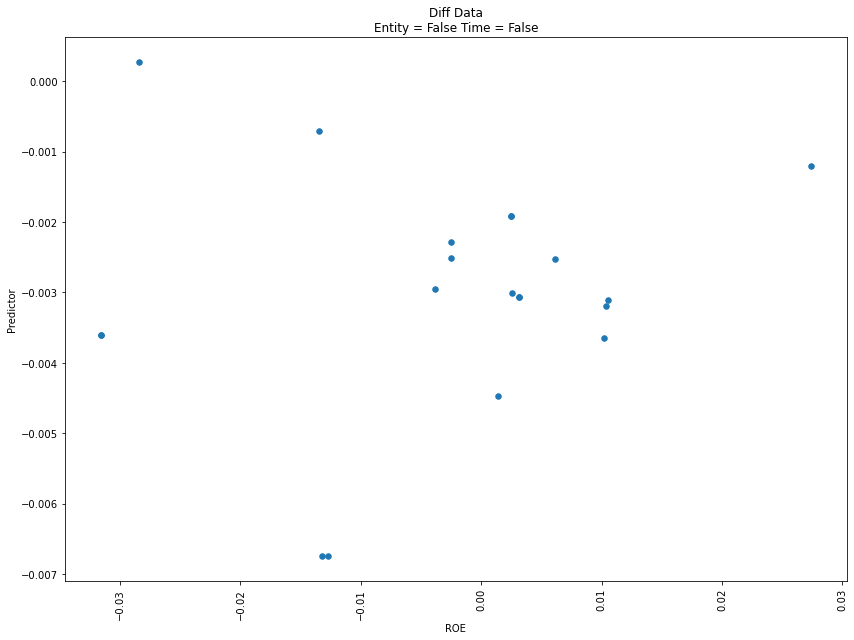

In [12]:
 # plot observed vs. predicted values
fig, ax = plt.subplots(figsize = (14,10))
reg_data.plot.scatter(x = y_name[0],
                      y = "Predictor", 
                      s = 30, ax = ax)
plt.xticks(rotation=90)
plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
plt.show()
plt.close()